# Assignment 2

Demostrate consequences of No Free Lunch Theorem: every model of machine learning makes **assumptions** about dataset properties. If the assumption fails, model perfoms badly. If the assumption is met, model perfoms good.

For each of the tasks, described below:
1. create a dataset to meet the description. For demonstration purposes, feature dimension size = 2    
1. train the models and evaluate accuracy. (with a training pipeline, described in the seminar) 
1. Show which model is better.   
1. Write what assumptions were used, and why model exibits such behavior.  
1. Plot dataset to demonstrate its properties. (Scatter plot, classes with different colors)  


Tasks:

1. Create dataset for binary classification task (binary crossentropy), 
where k-NN perfoms **worse** than logistic regression

2. Create dataset for binary classification task (binary crossentropy), 
where logistic regression perfoms **worse** than k-NN

3. Create dataset for binary classification task (binary crossentropy), 
where k-NN with cosine distance perfoms **better** than k-NN with euclidean distance


! If there is no explanation, why one model perfoms better than the other on your dataset, the task does not count.  
! if the training pipeline is not used, the task does not count.  

Import necessary packages:

In [61]:
import numpy as np
import random
import matplotlib.pyplot as plt

Import necessary tools from Scikit-Learn:

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

Define fucntion for training-validation-testing routine:

In [56]:
def training_pipeline(clf, X, y, param_dict):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    ## training:
    clf.fit(X_train, y_train)
    print("Accuracy on training subsample w/o regularization: ", clf.score(X_train, y_train))
    # validation:
    validator = GridSearchCV(clf,
                             param_grid = param_dict,
                             cv = 5)
    validator.fit(X_train, y_train)
    print("Best mean accuracy on cross-validation of testing subsample after regularization: ", validator.best_score_)
    print("Best hyperparams: ", validator.best_params_)
    clf = validator.best_estimator_
    ## testing:
    print("Accuracy on testing subsample: ", clf.score(X_test, y_test))

## 1. Create dataset for binary classification task (binary crossentropy), where k-NN perfoms **worse** than logistic regression

<b>Решение: </b>Так как логистическая регрессия классифицирует точки на основе значения экспоненты от многочлена $a_1*x_1 + ... + a_m*x_m$, то наилучший результат для неё будет достигаться на линейно разделимой выборке. Метод $K$ ближайших соседей же присваивает метки классов на основе меток классов наиболее близких объектов в обучающей выборке. Для того, чтобы решить эту задачу, нам нужно сгенерировать выборку, которая будет линейно разделима, но в то же время в которой часто будут близки друг к другу объекты разных классов. Примером такой выборки может быть выборка, в которой точки в пространстве признаков $(X1, X2)$, соответствующие объектам, лежат разреженно на довольно близких друг к другу двух параллельных прямых, причём на каждой прямой лежат только точки одного класса.

In [6]:
from numpy import vectorize

In [7]:
import random

In [43]:
X1 = [(x, 2*x + 5) for x in range(0, 100, 5)]
X0 = [(x, z+2.5) for x, z in X1]
X = np.array(X1+X0)
y = np.array([1 for i in range(20)] + [0 for i in range(20)])

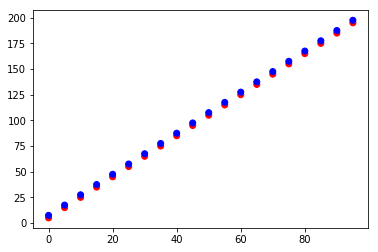

In [44]:
plt.figure()
color = ["red" if i==1 else "blue" for i in y]
#label = ["class = 1" if i==1 else "class = 0" for i in y]
plt.scatter([i[0] for i in X],
            [i[1] for i in X]
            , color=color)
plt.show()

In [57]:
training_pipeline(LogisticRegression(solver='liblinear'), X, y,
                 {'C': np.arange(.01,1,.01)})

Accuracy on training subsample w/o regularization:  0.8333333333333334
Best mean accuracy on cross-validation of testing subsample after regularization:  0.8333333333333334
Best hyperparams:  {'C': 0.85}
Accuracy on testing subsample:  0.8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [60]:
training_pipeline(KNeighborsClassifier(), X, y,
                 {'n_neighbors': range(1, 10)})

Accuracy on training subsample w/o regularization:  0.7
Best mean accuracy on cross-validation of testing subsample after regularization:  0.4666666666666667
Best hyperparams:  {'n_neighbors': 4}
Accuracy on testing subsample:  0.2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Как и следовало ожидать, логистическая регрессия справляется лучше по accuracy

## 2. Create dataset for binary classification task (binary crossentropy), where logistic regression perfoms **worse** than k-NN

<b>Решение: </b>Логистическая регрессия хорошо справляется с линейно разделимыми выборками, а Метод $K$ ближайших соседей - с выборками, в которых оюъекты одного класса лежат близко друг к другу. Соответственно для того, чтобы получить датасет, на которой KNN будет справляться лучше логистиечкой регрессии, сгенерируем линейно неразделимую выборку, на которой, однако, будут наблюдаться устойчивые скопления объектов одного класса. Для этого разделим координатную плоскость на четыре квадрата и присвоим класс 1 точкам в левом нижнем и правом верхнем квадратах, а точкам в правом нижнем и левом верхнем квадратах - класс 0. Так как точки класса 1 нельзя будет отделить от точек класса 1 только одной прямой, наша выборка будет линейно неразделима.

In [74]:
X_1 = [(random.uniform(0,2), random.uniform(0,2)) for i in range(100)]
y_1 = [1 for i in range(100)]
X_2 = [(random.uniform(2,4), random.uniform(2,4)) for i in range(100)]
y_2 = [1 for i in range(100)]
X_3 = [(random.uniform(0,2), random.uniform(2,4)) for i in range(100)]
y_3 = [0 for i in range(100)]
X_4 = [(random.uniform(2,4), random.uniform(0,2)) for i in range(100)]
y_4 = [0 for i in range(100)]
X = np.array(X_1+X_2+X_3+X_4)
y = np.array(y_1+y_2+y_3+y_4)

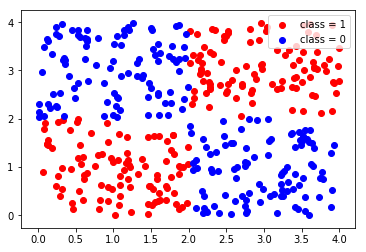

In [75]:
plt.figure()
plt.scatter([i[0] for i in X_1],
            [i[1] for i in X_1],
            color="red", label="class = 1")
plt.scatter([i[0] for i in X_2],
            [i[1] for i in X_2], color="red")
plt.scatter([i[0] for i in X_3],
            [i[1] for i in X_3], color="blue", label="class = 0")
plt.scatter([i[0] for i in X_4],
            [i[1] for i in X_4], color="blue")
plt.legend()
plt.show()

In [65]:
training_pipeline(LogisticRegression(solver='liblinear'), X, y,
                 {'C': np.arange(.01,1,.01)})

Accuracy on training subsample w/o regularization:  0.5766666666666667
Best mean accuracy on cross-validation of testing subsample after regularization:  0.58
Best hyperparams:  {'C': 0.7000000000000001}
Accuracy on testing subsample:  0.47


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [66]:
training_pipeline(KNeighborsClassifier(), X, y,
                 {'n_neighbors': range(1, 10)})

Accuracy on training subsample w/o regularization:  0.9933333333333333
Best mean accuracy on cross-validation of testing subsample after regularization:  0.97
Best hyperparams:  {'n_neighbors': 5}
Accuracy on testing subsample:  0.94


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Как и следовало ожидать, KNN справляется лучше по accuracy

## 3. Create dataset for binary classification task (binary crossentropy), where k-NN with cosine distance perfoms **better** than k-NN with euclidean distance

<b>Решение: </b>Для евклидова расстояния важны конкретные значения векторов измерений, а для косинусного расстояния - только направление векторов (Так, между векторами [1,2] и [2,4] косинусное расстояние будет равно нулю. Соответственно, в выборке. на которой KNN с косинусным расстоянием будет справляться хорошо, а KNN с евклидовым расстоянием - плохо, точки двух классов должны лежать достаточно близко друг к другу, но на разнонаправленных векторах:

In [105]:
np.random.seed(42)
## (1, 2) - направление вектора для класса 1:
X_1 = [(1*k , 2*k) for k in np.random.normal(0, 1, size=(100, ))]
y_1 = [1 for i in range(100)]
## используем тот же параметр для ГСЧ, чтобы получить то же распределение, что и в X_1:
np.random.seed(42)
## (0.95, 2.05) - направление вектора для класса 0:
X_2 = [(0.95*k , 2.05*k ) for k in np.random.normal(0, 1, size=(100, ))]
y_2 = [0 for i in range(100)]

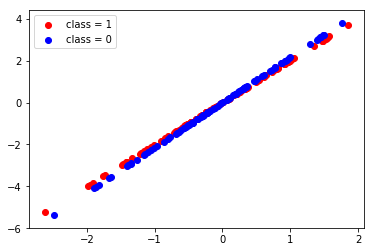

In [106]:
plt.figure()
plt.scatter([i[0] for i in X_1],
            [i[1] for i in X_1],
            color="red", label="class = 1")
plt.scatter([i[0] for i in X_2],
            [i[1] for i in X_2], color="blue", label="class = 0")
plt.legend()
plt.show()

In [107]:
X = np.array(X_1 + X_2)
y = np.array(y_1 + y_2)

In [108]:
training_pipeline(KNeighborsClassifier(metric="euclidean"), X, y,
                 {'n_neighbors': range(1, 10)})

Accuracy on training subsample w/o regularization:  0.6466666666666666
Best mean accuracy on cross-validation of testing subsample after regularization:  0.5333333333333333
Best hyperparams:  {'n_neighbors': 1}
Accuracy on testing subsample:  0.56


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [109]:
training_pipeline(KNeighborsClassifier(metric="cosine"), X, y,
                 {'n_neighbors': range(1, 10)})

Accuracy on training subsample w/o regularization:  1.0
Best mean accuracy on cross-validation of testing subsample after regularization:  1.0
Best hyperparams:  {'n_neighbors': 1}
Accuracy on testing subsample:  1.0


Как и следовало ожидать, KNN с косинусным расстоянием справляется лучше по accuracy